In [1]:
import pickle

In [3]:
with open(r'/content/images.p','rb') as f:
    images = pickle.load(f)
with open(r'/content/labels.p',"rb") as f:
    labels = pickle.load(f)

In [8]:
set(labels)

{'Tool in bad condition', 'Tool in good condition'}

In [10]:
print(images.shape)
print(labels.shape)

(302, 100, 100)
(302,)


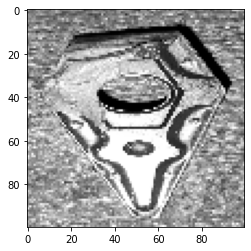

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[60],cmap = plt.get_cmap("gray"))
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels=le.fit_transform(labels)

In [15]:
set(labels)

{0, 1}

In [19]:
import numpy as np

In [21]:
n_insert = len(set(labels))
print("n_insert of inset",n_insert)
label_mapping = le.inverse_transform(np.arange(n_insert))
for i in range(len(label_mapping)):
  print(i,"-->",label_mapping[i])
  

n_insert of inset 2
0 --> Tool in bad condition
1 --> Tool in good condition


In [22]:
import cv2

In [23]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [24]:
images = np.array(list(map(preprocessing,images)))
print("shape of Input",images.shape)

shape of Input (302, 100, 100, 1)


In [3]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)

ModuleNotFoundError: No module named 'tensorflow'

In [29]:
categories = labels.shape[1]
print(categories)

2


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout



In [135]:
model   = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(100,100,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(categories,activation="softmax"))
model.compile(RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 98, 98, 128)       1280      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 48, 48, 64)        32832     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 23, 23, 32)        8224      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 11, 11, 32)     

In [137]:
h = model.fit(images,labels,validation_split=0.1,batch_size=20,epochs=10,verbose=1)

Epoch 1/10
14/14 [==============================] - 12s 794ms/step - loss: 0.6615 - accuracy: 0.6199 - val_loss: 0.7651 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 11s 792ms/step - loss: 0.6462 - accuracy: 0.6568 - val_loss: 0.8477 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 9s 670ms/step - loss: 0.6390 - accuracy: 0.6494 - val_loss: 1.0607 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 11s 770ms/step - loss: 0.6209 - accuracy: 0.6716 - val_loss: 0.6120 - val_accuracy: 0.9032
Epoch 5/10
14/14 [==============================] - 11s 781ms/step - loss: 0.5984 - accuracy: 0.6790 - val_loss: 0.4586 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 11s 788ms/step - loss: 0.5525 - accuracy: 0.6827 - val_loss: 0.6832 - val_accuracy: 0.6129
Epoch 7/10
14/14 [==============================] - 11s 785ms/step - loss: 0.5083 - accuracy: 0.7380 - val_loss: 0.7159 - val_accur

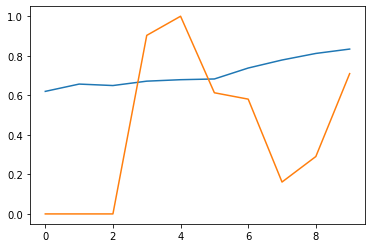

In [138]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()

In [139]:
from tensorflow.keras.models import Model

layer0 = Model(model.layers[0].input,model.layers[0].output)
features = layer0.predict(images[10].reshape(1,100,100,1))

1/1 [==============================] - 0s 69ms/step


In [140]:
features.shape

(1, 98, 98, 128)

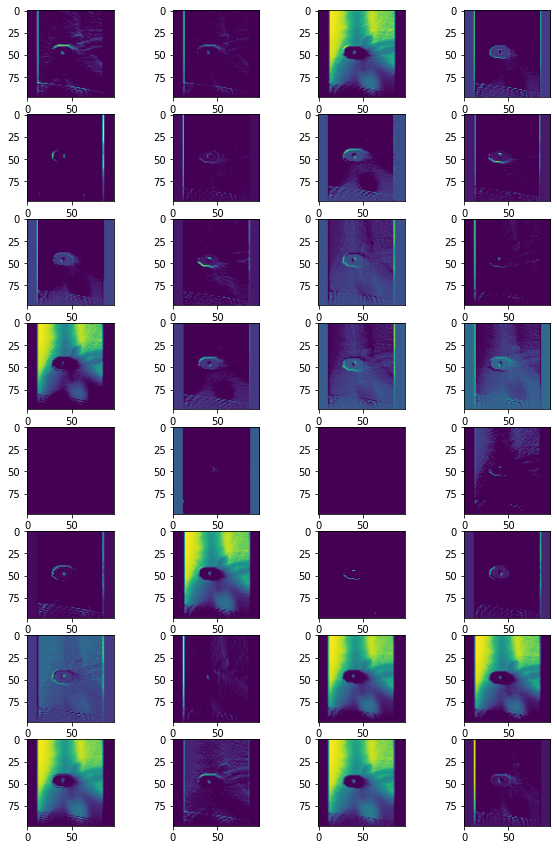

In [141]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes=plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [157]:
from google.colab import files
upload = files.upload()


Saving Tool_Good (65).jpg to Tool_Good (65).jpg


In [159]:
d = list(upload.keys())[0]

<ipython-input-160-518d6b0f749f>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a = np.fromstring(upload[d],np.uint8)


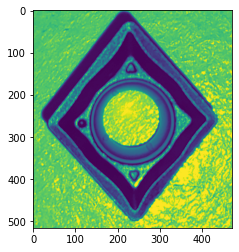

In [160]:
import cv2 
a = np.fromstring(upload[d],np.uint8)
img = cv2.imdecode(a,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [161]:
img = np.asarray(img)
img = cv2.resize(img,(100,100))
img = preprocessing(img)

In [162]:
img = img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 37ms/step
[[0.48987547 0.51012456]]


In [163]:
prediction = model.predict(img)
p = np.argmax(prediction,axis=1)
p


1/1 [==============================] - 0s 35ms/step


array([1])

In [164]:
model.save("final_model.h5")